In [26]:
import pandas as pd
import math
import scipy
from sklearn import preprocessing
from scipy.stats import norm
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

In [27]:
#Task 3

print('Enter absolute directory path to data files => C:\ Users\.......\ sample data \ Z')
directory = input()
# directory =  "C:\\Users\\abhee\\Desktop\\asu\\cse 515(mwdb)\\project\\phase1\\sample_data\\Z"

# change the current directory to data files directory
os.chdir(directory)
all_files = glob.glob('*.csv')
total_files = len(all_files)

vector_file = open("vectors.txt", "r")

file_string = vector_file.read()
data_list = file_string.split('\n')

tf = [[] for _ in range(total_files)]
tfidf = [[] for _ in range(total_files)]
tfidf2 = [[] for _ in range(total_files)]
feature_list1 = []

for line in data_list:
    word_list = line.split(',')
    
    data_type = word_list[0]
    curr_file = int(word_list[1])
    if len(word_list) == 0:
        continue
    elif data_type == 'TF':
        tf[curr_file-1] = list(map(float, word_list[2:])) 
    elif data_type == 'TFIDF':
        tfidf[curr_file-1] = list(map(float, word_list[2:])) 
    elif data_type == 'TFIDF2':
        tfidf2[curr_file-1] = list(map(float, word_list[2:])) 
    elif data_type == 'FeatureList1':
        feature_list1 = word_list[2:]

vector_file.close()

Enter absolute directory path to data files => C:\ Users\.......\ sample data \ Z
C:\Users\abhee\Desktop\asu\cse 515(mwdb)\project\phase1\sample_data\Z


In [42]:
print('Enter gesture file number to view in heatmap from 1 to 66')
print('Test File 1-6 are from file 61 to 66')
gesture_file = int(input())
total_sensors = 20

f = open('{0}.wrd'.format(gesture_file),'r')
file_string = f.read()
f.close()

# to account for zero indexing
gesture_file -= 1

data_list = file_string.split('\n')

heatmap_tf = [[] for _ in range(total_sensors)]
heatmap_tfidf = [[] for _ in range(total_sensors)]
heatmap_tfidf2 = [[] for _ in range(total_sensors)]

for word in data_list:
    word_list = word.split(',')
    curr_sensor = int(word_list[1])
    feature1 = word_list[3]
    index1 = feature_list1.index(feature1)
    tf_val = tf[gesture_file][index1]
    tfidf_val = tfidf[gesture_file][index1]
    tfidf2_val = tfidf2[gesture_file][index1]
    heatmap_tf[curr_sensor].append(tf_val)
    heatmap_tfidf[curr_sensor].append(tfidf_val)
    heatmap_tfidf2[curr_sensor].append(tfidf2_val)

# normalize heatmap values in range 0 to 255
def normalize_heatmap(heatmap):
    for i in range(len(heatmap)):
        row = heatmap[i]
        row_max = max(row)
        row_min = min(row)
        for j in range(len(heatmap[0])):
            if (row_max - row_min) != 0:
                heatmap[i][j] = 255*(heatmap[i][j] - row_min)/(row_max - row_min)
            else:
                heatmap[i][j] = 0.0
    return heatmap
heatmap_tf = normalize_heatmap(heatmap_tf)
heatmap_tfidf = normalize_heatmap(heatmap_tfidf)
heatmap_tfidf2 = normalize_heatmap(heatmap_tfidf2)

Enter gesture file number to view in heatmap from 1 to 66
Test File 1-6 are from file 61 to 66
66


Enter the data type for plotting heatmap
tf / tfidf / tfidf2 (Enter Lower Case Characters)
tfidf2


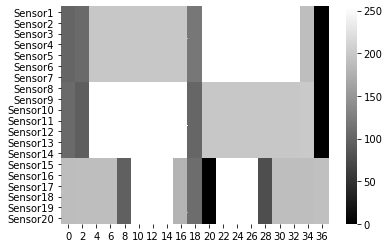

In [45]:
print('Enter the data type for plotting heatmap')
print('tf / tfidf / tfidf2 (Enter Lower Case Characters)')
data_type = input()
heatmap = []

if data_type == 'tf':
    heatmap = heatmap_tf
elif data_type == 'tfidf':
    heatmap = heatmap_tfidf
elif data_type == 'tfidf2':
    heatmap = heatmap_tfidf2
else:
    print('Incorrect data type. Read instructions and enter correct data type')
    
x_axis_labels = range(0,len(heatmap[0])*2,2)
y_axis_labels = ['Sensor{0}'.format(i+1) for i in range(20)]

sns.heatmap(heatmap, cmap='gist_gray', xticklabels=x_axis_labels, yticklabels=y_axis_labels)